In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import sklearn

# Preprocessing

In [4]:
df = pd.read_csv('air_quality_china1.csv', delimiter=',')

# preprocessing, remove categorical features
df.pop("station")
df.pop("wd")

# filter for data from 2017
is_2017 = df['year']==2017
df_2017 = df[is_2017]
cols = ["No","year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]


# check data
print(df_2017.shape)
df_2017.head()
df_2017.tail()


(1416, 16)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,1.2
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,1.3


### Plot all features

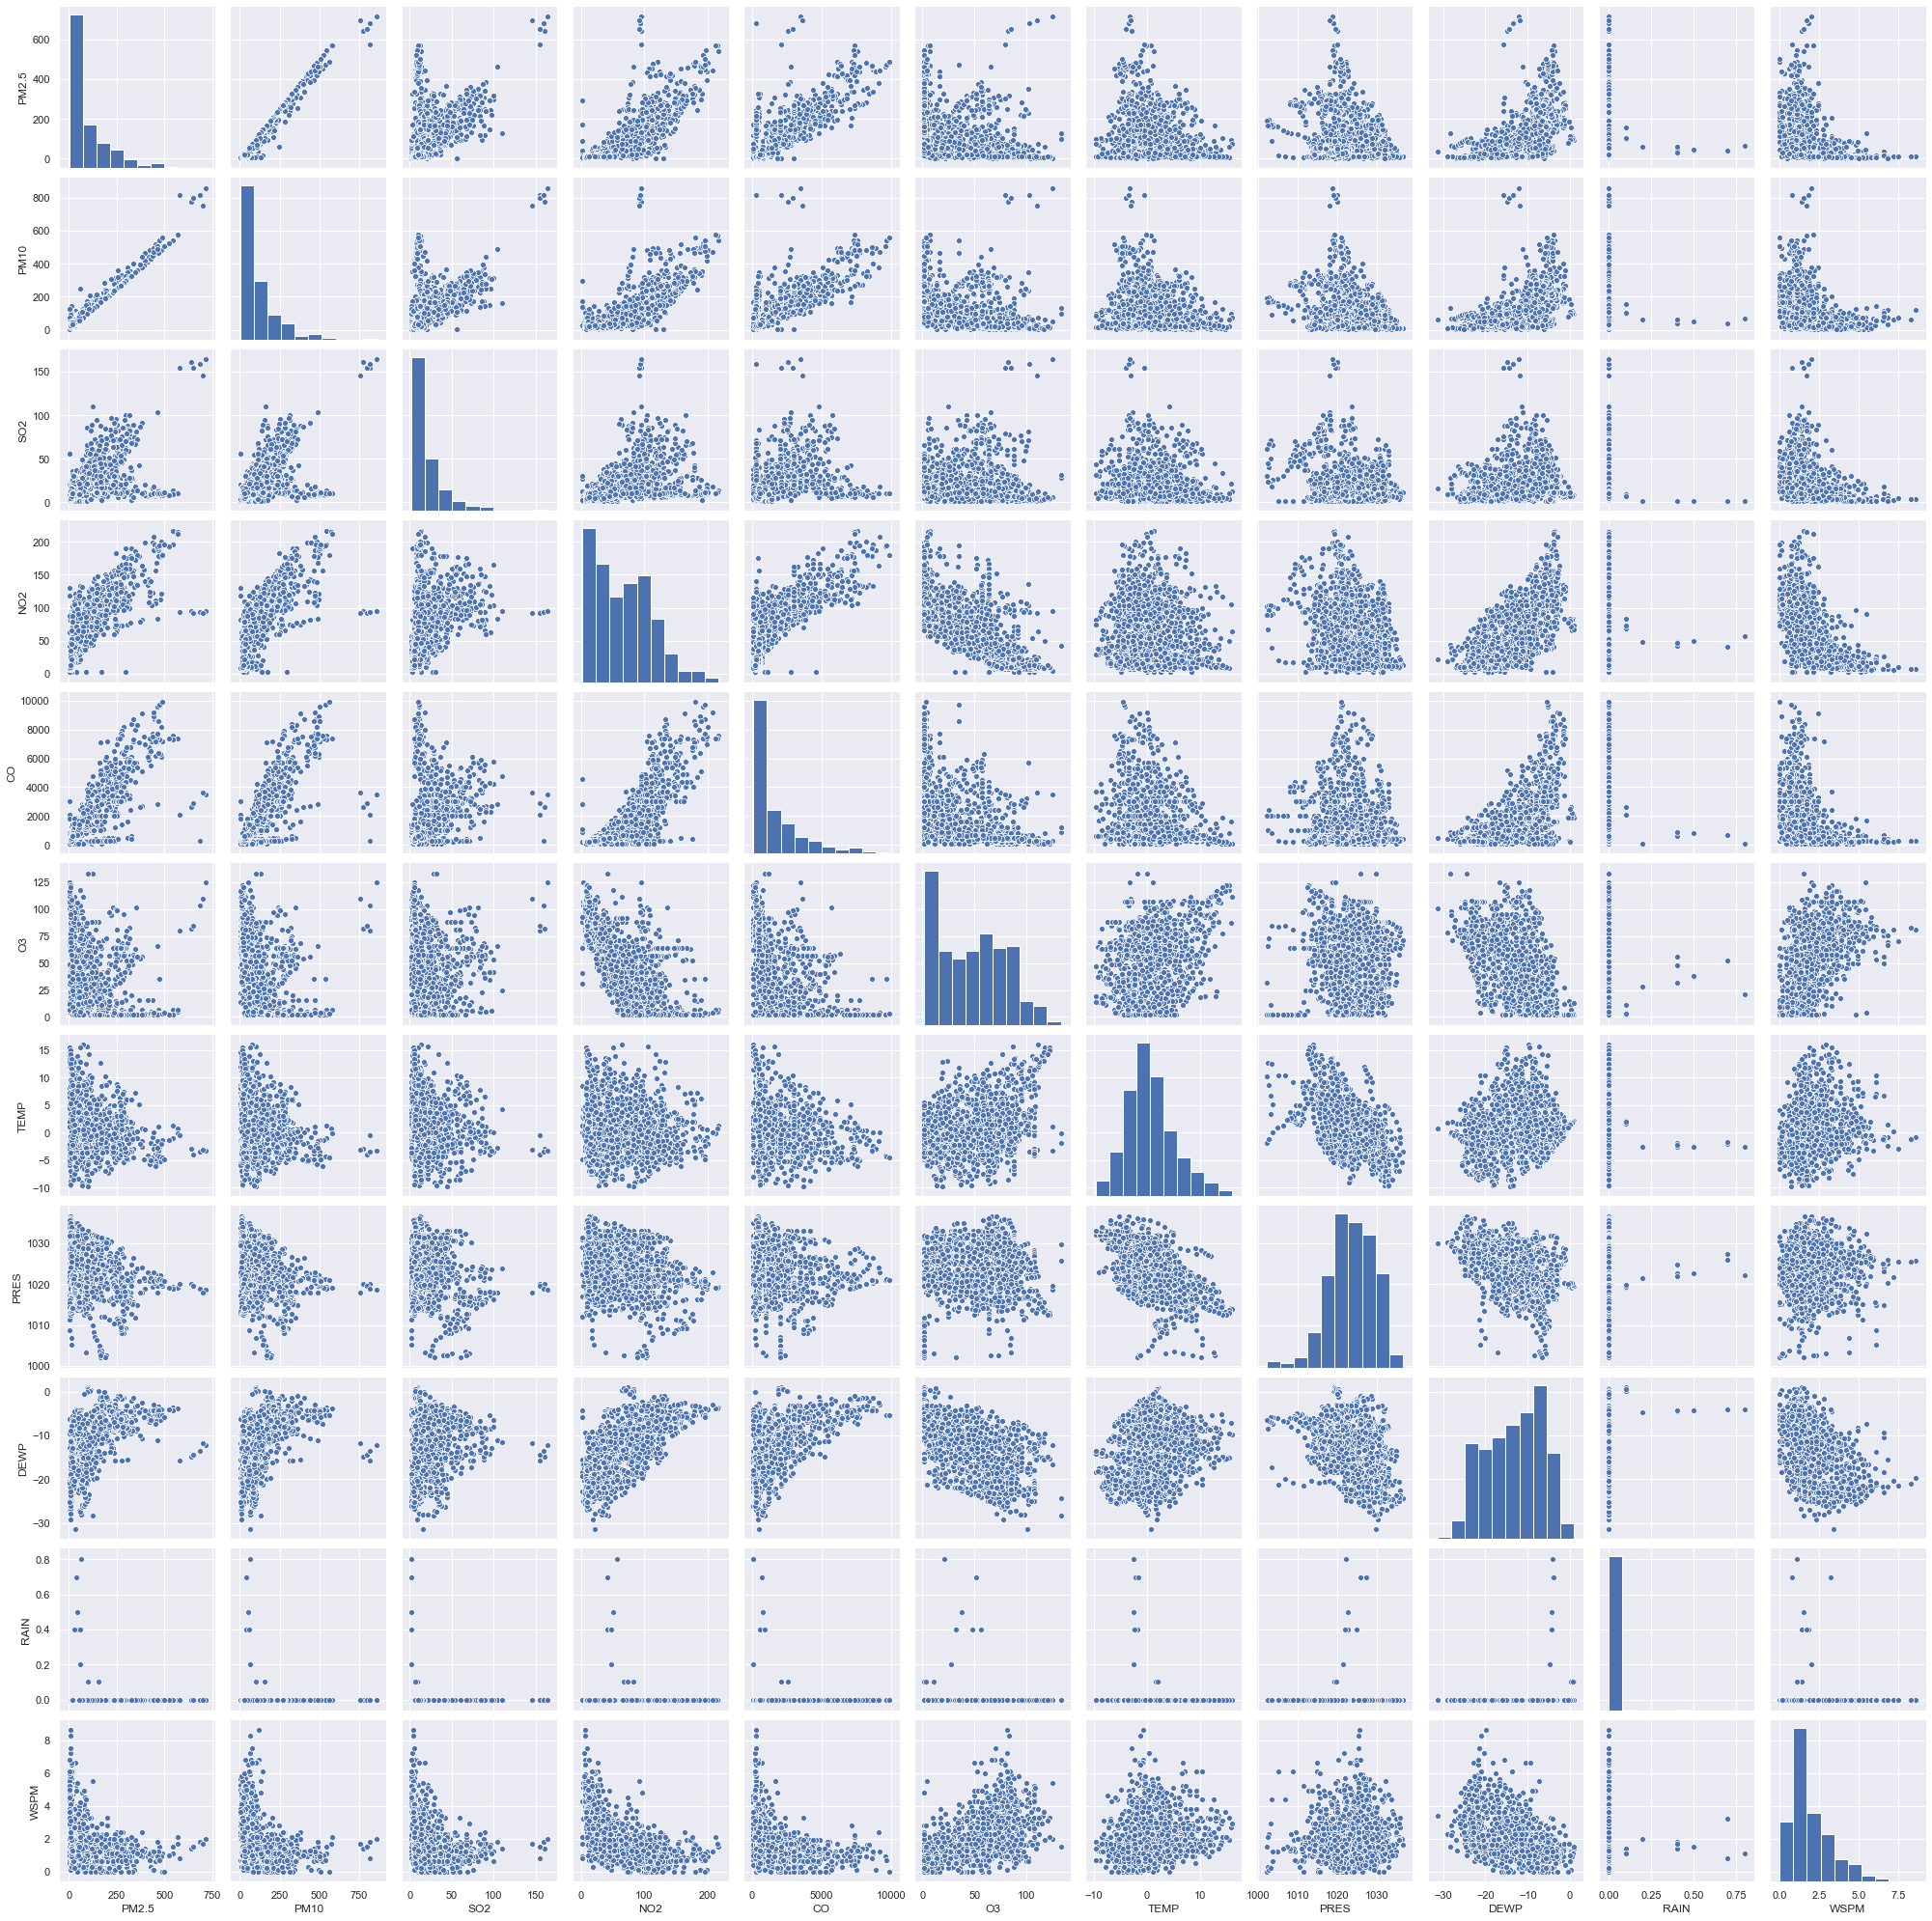

In [6]:
%matplotlib inline
sns.set()
cols_sel = ["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]
#df = pd.DataFrame(df,cols)
sns.pairplot(df_2017[cols_sel])

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

### Remove Nan values

In [8]:
air_data = df_2017.dropna(axis=0)
np.isnan(air_data).sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [9]:
air_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,33649,2017,1,1,0,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
33649,33650,2017,1,1,1,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
33650,33651,2017,1,1,2,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
33651,33652,2017,1,1,3,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
33652,33653,2017,1,1,4,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,1.2


In [10]:
# save as file
air_data.to_csv(r'C:\Users\annem_000.000\Documents\Uni\6. Semester\Data Analysis Mining\Project\data_selection.csv', index=False)

### Before normalizing, remove irrelevant columns: No, year, month, day, hour

In [11]:
air_data_sel = air_data.copy()
air_data_sel.pop("year")
air_data_sel.pop("No")
air_data_sel.pop("month")
air_data_sel.pop("hour")
air_data_sel.pop("day")
air_data_sel.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
33649,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
33650,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
33651,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
33652,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0


In [12]:
# calculate stats for data
train_stats = air_data_sel.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
PM2.5,1361.0,95.495959,115.289980,3.0,12.0,47.00,141.00,713.0
PM10,1361.0,108.159442,118.938604,3.0,24.0,66.00,151.00,858.0
SO2,1361.0,21.029390,21.172972,2.0,7.0,14.00,28.00,164.0
NO2,1361.0,66.572373,45.271559,2.0,26.0,62.00,98.00,217.0
CO,1361.0,1683.174137,1874.163478,100.0,400.0,800.00,2400.00,9900.0
O3,1361.0,47.546657,32.338368,2.0,17.0,49.00,74.00,133.0
TEMP,1361.0,0.687956,4.588397,-9.7,-2.4,0.05,3.20,15.9
PRES,1361.0,1023.506160,5.844552,1002.1,1019.8,1023.70,1027.75,1036.6
DEWP,1361.0,-13.153784,6.597315,-31.3,-18.7,-12.30,-7.80,0.9
RAIN,1361.0,0.002719,0.037573,0.0,0.0,0.00,0.00,0.8


## Normalize using 1) z-score and 2) range norm

In [30]:

# PART 1: Normalize the data using standard deviation --> z-score standartization
def z_score(x):
    return (x - train_stats['mean'])/ train_stats['std']

# PART 2: Normalize using range
def norm_range(x):
    return (x - train_stats['mean'])/ (train_stats['max'] - train_stats['min'])


### data z-score standardized

In [34]:
data_zscore = z_score(air_data_sel)
data_norm = norm_range(air_data_sel)

data_zscore.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,3.378473,3.260847,-0.615378,1.202248,2.356692,-1.346594,-1.174257,-0.240593,1.069190,-0.072355,-0.732611
33649,3.309082,3.269254,-0.662608,1.025536,2.463406,-1.346594,-1.283227,-0.206373,1.023717,-0.072355,-0.962002
33650,3.109585,3.033839,-0.662608,0.981358,2.410049,-1.346594,-1.326815,-0.172153,1.008559,-0.072355,-0.656148
33651,2.797329,2.663900,-0.709838,0.937181,2.249978,-1.377517,-1.283227,-0.172153,1.054032,-0.072355,-0.656148
33652,2.970805,3.025431,-0.520918,1.246426,3.210406,-0.975518,-1.239639,-0.274813,1.114663,-0.072355,-0.732611


### data normalized by range

In [35]:
data_norm.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,0.548597,0.453615,-0.080428,0.253152,0.450697,-0.332417,-0.210467,-0.040758,0.219062,-0.003398,-0.111409
33649,0.537330,0.454784,-0.086601,0.215942,0.471105,-0.332417,-0.229998,-0.034961,0.209745,-0.003398,-0.146293
33650,0.504935,0.422036,-0.086601,0.206640,0.460901,-0.332417,-0.237811,-0.029164,0.206639,-0.003398,-0.099781
33651,0.454231,0.370574,-0.092774,0.197338,0.430288,-0.340051,-0.229998,-0.029164,0.215956,-0.003398,-0.099781
33652,0.482400,0.420866,-0.068083,0.262454,0.613962,-0.240814,-0.222186,-0.046555,0.228378,-0.003398,-0.111409


In [22]:
data_norm.to_csv(r'C:\Users\annem_000.000\Documents\Uni\6. Semester\Data Analysis Mining\Project\preprocessed_data_norm.csv', index=False)

### select features for PCA: pm2.5, pm10, o3, no2, DEWP, WSPM

In [23]:
cols_pca = ["PM2.5","PM10","NO2","O3","DEWP","WSPM"]
pca_data_norm = data_norm[cols_pca]
pca_data_zscore = data_zscore[cols_pca]

In [24]:
pca_data_norm.to_csv(r'C:\Users\annem_000.000\Documents\Uni\6. Semester\Data Analysis Mining\Project\pca_6comp_data_selection_norm.csv', index=False)

### plot z-score standardized

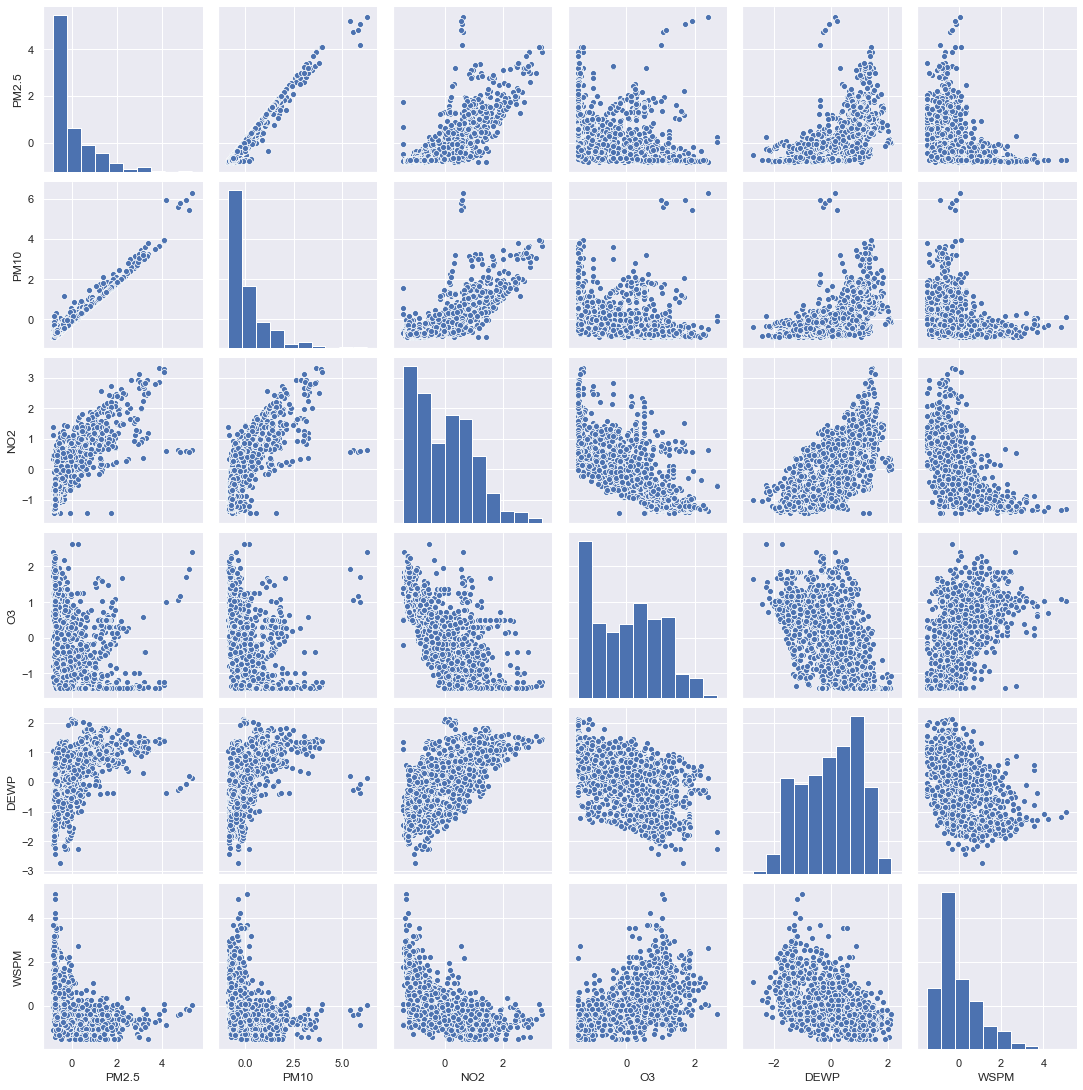

In [17]:
sns.pairplot(pca_data_zscore)

### plot range normalized


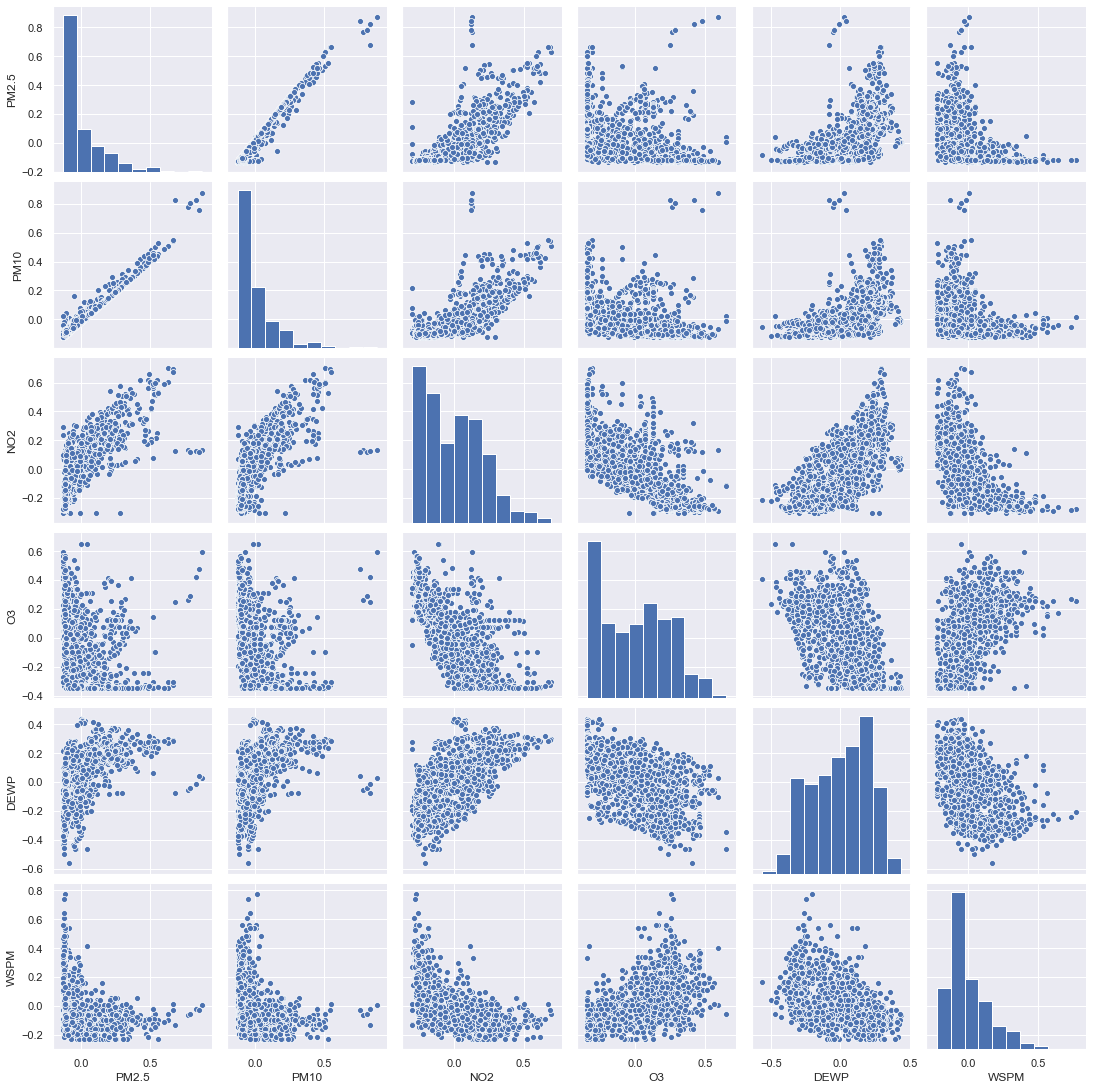

In [18]:
sns.pairplot(pca_data_norm)